## Task 1: KEGG and gene id mapping

Familiarize yourself with the KEGG Rest interface and how to access it with Biopyhton:

http://www.genome.jp/kegg/rest/keggapi.html

http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

### Subtask 1.1 Extract gene lists for all (mouse) KEGG pathways and store them in a suitable Python data structure

In [149]:
import Bio
from Bio import SeqIO
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral

from IPython.display import Image, HTML
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import StringIO
from scipy.stats import chi2_contingency, chi2, fisher_exact
import scipy.stats.stats
import statsmodels.sandbox.stats.multicomp
from random import randint
import random 

In [2]:
# A bit of code that will help us display the PDF output
def PDF(filename):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

# A bit of helper code to shorten long text
def head(text, lines=10):
    """ Print the first lines lines of the passed text.
    """
    print '\n'.join(text.split('\n')[:lines] + ['[...]'])

In [3]:
# Kyoto Encyclopedia of Genes and Genomes
print(kegg_info("kegg").read())

kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 79.0+/09-28, Sep 16
                 Kanehisa Laboratories
                 pathway     462,412 entries
                 brite       165,896 entries
                 module      377,111 entries
                 disease       1,662 entries
                 drug         10,364 entries
                 environ         850 entries
                 orthology    20,133 entries
                 genome        4,750 entries
                 genes     20,175,595 entries
                 dgenes       99,485 entries
                 compound     17,752 entries
                 glycan       10,994 entries
                 reaction     10,252 entries
                 rpair               entries
                 rclass        3,059 entries
                 enzyme        6,791 entries



In [4]:
l = kegg_list('pathway', 'mmu').read()

In [5]:
l

"path:mmu00010\tGlycolysis / Gluconeogenesis - Mus musculus (mouse)\npath:mmu00020\tCitrate cycle (TCA cycle) - Mus musculus (mouse)\npath:mmu00030\tPentose phosphate pathway - Mus musculus (mouse)\npath:mmu00040\tPentose and glucuronate interconversions - Mus musculus (mouse)\npath:mmu00051\tFructose and mannose metabolism - Mus musculus (mouse)\npath:mmu00052\tGalactose metabolism - Mus musculus (mouse)\npath:mmu00053\tAscorbate and aldarate metabolism - Mus musculus (mouse)\npath:mmu00061\tFatty acid biosynthesis - Mus musculus (mouse)\npath:mmu00062\tFatty acid elongation - Mus musculus (mouse)\npath:mmu00071\tFatty acid degradation - Mus musculus (mouse)\npath:mmu00072\tSynthesis and degradation of ketone bodies - Mus musculus (mouse)\npath:mmu00100\tSteroid biosynthesis - Mus musculus (mouse)\npath:mmu00120\tPrimary bile acid biosynthesis - Mus musculus (mouse)\npath:mmu00130\tUbiquinone and other terpenoid-quinone biosynthesis - Mus musculus (mouse)\npath:mmu00140\tSteroid hormo

In [6]:
df_path_list = pd.DataFrame([x.replace(";", "\t", 1).split("\t") for x in l.split("\n")], columns =["Pathway_ID", "Pathway_Description"])
df_path_list.set_index("Pathway_ID",inplace=True)
df_path_list.tail()

,Pathway_Description
Pathway_ID,
path:mmu05410,Hypertrophic cardiomyopathy (HCM) - Mus muscul...
path:mmu05412,Arrhythmogenic right ventricular cardiomyopath...
path:mmu05414,Dilated cardiomyopathy - Mus musculus (mouse)
path:mmu05416,Viral myocarditis - Mus musculus (mouse)
,None


In [7]:
lis = kegg_get("path:mmu00010").read().split("\n")
lis

['ENTRY       mmu00010                    Pathway',
 'NAME        Glycolysis / Gluconeogenesis - Mus musculus (mouse)',
 'DESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synthesis pathway of glucose from noncar

In [8]:
#workaround to parse Genes per Pathway
def get_gene_per_path(l):
    bla = []
    s = 0
    e = len(lis)
    geneli = []
    mb = []
    genes = []
    for i in range(len(lis)):
        if(lis[i].startswith("GENE")):
            s = i
        elif lis[i].startswith("COMPOUND"):
            e = i
    for k in range(s,e):
        bla.append(lis[k])

    for b in range(len(bla)):
        geneli.append(bla[b].split("\t"))
    for u in range(0, len(geneli)):
        t = str(str(geneli[u]).split(";")).split(" ")
        mb.append(t)
        mb[u] = filter(None, mb[u])
    for r in range(len(mb)):
        if len(mb[r]) > 2:
            #maybe as dictionary 
            #tmp = {mb[r][2].replace("," , "").replace("\"" , "") : mb[r][1]}
            tmp = mb[r][2].replace("," , "").replace("\"" , "")
            genes.append(tmp)
    return genes

In [10]:
genes_list = []
for row in df_path_list.index[:-1]:
    lis = kegg_get(row).read().split("\n")
    print row
    genes_list.append([row, get_gene_per_path(lis)])

path:mmu00010
path:mmu00020
path:mmu00030
path:mmu00040
path:mmu00051
path:mmu00052
path:mmu00053
path:mmu00061
path:mmu00062
path:mmu00071
path:mmu00072
path:mmu00100
path:mmu00120
path:mmu00130
path:mmu00140
path:mmu00190
path:mmu00220
path:mmu00230
path:mmu00232
path:mmu00240
path:mmu00250
path:mmu00260
path:mmu00270
path:mmu00280
path:mmu00290
path:mmu00300
path:mmu00310
path:mmu00330
path:mmu00340
path:mmu00350
path:mmu00360
path:mmu00380
path:mmu00400
path:mmu00410
path:mmu00430
path:mmu00450
path:mmu00471
path:mmu00472
path:mmu00480
path:mmu00500
path:mmu00510
path:mmu00511
path:mmu00512
path:mmu00514
path:mmu00520
path:mmu00524
path:mmu00531
path:mmu00532
path:mmu00533
path:mmu00534
path:mmu00561
path:mmu00562
path:mmu00563
path:mmu00564
path:mmu00565
path:mmu00590
path:mmu00591
path:mmu00592
path:mmu00600
path:mmu00601
path:mmu00603
path:mmu00604
path:mmu00620
path:mmu00630
path:mmu00640
path:mmu00650
path:mmu00670
path:mmu00730
path:mmu00740
path:mmu00750
path:mmu00760
path:m

In [11]:
all_genes = pd.DataFrame(genes_list, columns=["Pathway_ID", "Genes"])
all_genes.set_index("Pathway_ID", inplace=True)

In [12]:
df_genes = df_path_list.join(all_genes, how="inner")
df_genes.head()

,Pathway_Description,Genes
Pathway_ID,,
path:mmu00010,Glycolysis / Gluconeogenesis - Mus musculus (m...,"[Hk2, Hk3, Hk1, Hkdc1, Gck, Gpi1, Pfkl, Pfkm, ..."
path:mmu00020,Citrate cycle (TCA cycle) - Mus musculus (mouse),"[Cs, Csl, Acly, Aco2, Aco1, Idh1, Idh2, Idh3g,..."
path:mmu00030,Pentose phosphate pathway - Mus musculus (mouse),"[Gpi1, G6pd2, G6pdx, Pgls, H6pd, Pgd, Rpe, Tkt..."
path:mmu00040,Pentose and glucuronate interconversions - Mus...,"[Gusb, Kl, Ugt2b5, Ugt1a2, Ugt1a6a, Ugt2a1, Ug..."
path:mmu00051,Fructose and mannose metabolism - Mus musculus...,"[Mpi, Pmm2, Pmm1, Gmppb, Gmppa, Gmds, Tsta3, F..."


### Subtask 1.2: Save the KEGG gene sets as a gmt file after you made sure they have the proper gene ids with respect to your DE analysis

hints: 

http://biopython.org/wiki/Annotate_Entrez_Gene_IDs

http://www.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats

In [13]:
df_genes.to_csv("/home/engelha/Documents/Praktikum/Integrated_Bioinformatics/notebooks/DayY_KEGG_genes.csv", sep="\t")

## Task 2: Gene Set Enrichment

### Subtask 2.1: Read in the csv file you produced during the Differential Expression module, extract a gene list (as a python list of gene symbols) from your favorite multiple correction column (and store it in a variable)

In [14]:
DE = pd.read_csv("/home/engelha/Documents/Praktikum/Integrated_Bioinformatics/notebooks/Diff_Genes_Log2FC_INDEX.csv", index_col=0)

In [15]:
DE.index.names = ["Gene_ID"]
DE.head()

,Log2_FoldChange,MannWhit_P_values,bonferroni_p_Values_corrected,sidak_p_Values_corrected,holm-sidak_p_Values_corrected,holm_p_Values_corrected,simes-hochberg_p_Values_corrected,hommel_p_Values_corrected,fdr_bh_p_Values_corrected,fdr_by_p_Values_corrected,fdr_tsbh_p_Values_corrected,fdr_tsbky_p_Values_corrected
Gene_ID,,,,,,,,,,,,
Igh,0.036984,3.455967e-08,7.545759e-04,7.542913e-04,6.963077e-04,6.965502e-04,6.965157e-04,6.269470e-04,4.488851e-07,4.744026e-06,1.984149e-07,2.107534e-07
Hcfc2,0.019614,8.087184e-05,1.000000e+00,8.289547e-01,7.406464e-01,1.000000e+00,5.000000e-01,5.000000e-01,3.424985e-04,3.619682e-03,1.513902e-04,1.608044e-04
Ccdc112,0.077647,4.945441e-12,1.079788e-07,1.079798e-07,1.063428e-07,1.063418e-07,1.063418e-07,1.041658e-07,3.244404e-10,3.428836e-09,1.434082e-10,1.523261e-10
EG635895,0.065744,4.284527e-07,9.354836e-03,9.311218e-03,8.276260e-03,8.310697e-03,8.310697e-03,6.995775e-03,3.837094e-06,4.055219e-05,1.696061e-06,1.801531e-06
Srp72,0.000394,3.359962e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,5.000000e-01,3.750675e-01,1.000000e+00,1.657862e-01,1.760957e-01


In [16]:
sidaks = pd.Series(DE.index)
sidaks.head()

0         Igh
1       Hcfc2
2     Ccdc112
3    EG635895
4       Srp72
Name: Gene_ID, dtype: object

In [17]:
pathway_genes = []
for row in df_genes.index:
    pathway_genes = set(pathway_genes).union(set(df_genes.loc[row]["Genes"]))
len(pathway_genes)

9128

In [18]:
shared_genes = set(sidaks).intersection(pathway_genes)
len(shared_genes)

7061

In [19]:
crossDF_DE = DE.copy()
crossDF_DE.drop(crossDF_DE.columns[0:], axis=1, inplace=True)
crossDF_DE["Diff_Exp"] = False


In [20]:
r1 = list(df_genes.loc["path:mmu00510"]["Genes"])

In [21]:
crossDF_DE.Diff_Exp.loc[shared_genes] = True

In [22]:
crossDF_Path = pd.DataFrame([pathway_genes])
crossDF_Path = crossDF_Path.T
crossDF_Path.set_index(0, inplace=True)
crossDF_Path.drop("",axis=0, inplace=True)
crossDF_Path["path:mmu00010"] = False
crossDF_Path["path:mmu00010"].loc[r1] = True

In [29]:
cross_Joined = crossDF_DE.join(crossDF_Path, how="outer")
cross_Joined.replace(np.nan, False, inplace=True)

In [120]:
cross_Joined.head()

,Diff_Exp,path:mmu00010
(2006)']],False,False
(Japanese)']],False,False
)']],False,False
0610007C21Rik,False,False
0610007L01Rik,False,False


### Subtask 2.2: Perform gene set enrichment (Fisher's exact test or an hypergeometric test will do for our purposes) with the KEGG gene sets you extracted in Task 1 (you may want to store the results in a pandas dataframe and write them to csv)

hint:

https://genetrail2.bioinf.uni-sb.de/help?topic=set_level_statistics

In [44]:
cross_table = pd.crosstab(cross_Joined.Diff_Exp, cross_Joined["path:mmu00010"], margins=False)
cross_table.rename(columns={False : "not_in_PW", True : "in_PW"}, index={False : "not_DE", True : "DE"}, inplace=True)


In [295]:
cross_table

path:mmu00010,not_in_PW,in_PW
Diff_Exp,,
not_DE,16838,1
DE,7013,48


In [280]:
odds, pVal = fisher_exact(cross_table)
odds, pVal

(115.24654213603309, 1.191565794236168e-24)

In [57]:
df_Joined = DE.copy()
df_Joined.drop(df_Joined.columns[0:], axis=1, inplace=True)
df_Joined["Diff_Exp"] = False
df_Joined.Diff_Exp.loc[shared_genes] = True

for row in df_genes.index:
    print row
    r1 = list(df_genes.loc[row]["Genes"])
    r1 = filter(None, r1)
    df_temp = pd.DataFrame([pathway_genes])
    df_temp = df_temp.T
    df_temp.set_index(0, inplace=True)
    df_temp.drop("",axis=0, inplace=True)
    df_temp[row] = False
    df_temp[row].loc[r1] = True
    
    df_Joined = df_Joined.join(df_temp, how="outer")
    df_Joined.replace(np.nan, False, inplace=True)


path:mmu00010
path:mmu00020
path:mmu00030
path:mmu00040
path:mmu00051
path:mmu00052
path:mmu00053
path:mmu00061
path:mmu00062
path:mmu00071
path:mmu00072
path:mmu00100
path:mmu00120
path:mmu00130
path:mmu00140
path:mmu00190
path:mmu00220
path:mmu00230
path:mmu00232
path:mmu00240
path:mmu00250
path:mmu00260
path:mmu00270
path:mmu00280
path:mmu00290
path:mmu00300
path:mmu00310
path:mmu00330
path:mmu00340
path:mmu00350
path:mmu00360
path:mmu00380
path:mmu00400
path:mmu00410
path:mmu00430
path:mmu00450
path:mmu00471
path:mmu00472
path:mmu00480
path:mmu00500
path:mmu00510
path:mmu00511
path:mmu00512
path:mmu00514
path:mmu00520
path:mmu00524
path:mmu00531
path:mmu00532
path:mmu00533
path:mmu00534
path:mmu00561
path:mmu00562
path:mmu00563
path:mmu00564
path:mmu00565
path:mmu00590
path:mmu00591
path:mmu00592
path:mmu00600
path:mmu00601
path:mmu00603
path:mmu00604
path:mmu00620
path:mmu00630
path:mmu00640
path:mmu00650
path:mmu00670
path:mmu00730
path:mmu00740
path:mmu00750
path:mmu00760
path:m

In [60]:
df_Joined.head()

,Diff_Exp,path:mmu00010,path:mmu00020,path:mmu00030,path:mmu00040,path:mmu00051,path:mmu00052,path:mmu00053,path:mmu00061,path:mmu00062,...,path:mmu05321,path:mmu05322,path:mmu05323,path:mmu05330,path:mmu05332,path:mmu05340,path:mmu05410,path:mmu05412,path:mmu05414,path:mmu05416
(2006)']],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
(Japanese)']],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
)']],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610007C21Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610007L01Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [281]:
fishers = []
for entry in df_Joined.columns[1:]:
    print entry
    cross = pd.crosstab(df_Joined.Diff_Exp, df_Joined[entry], margins=False)
    cross.rename(columns={False : "not_in_PW", True : "in_PW"}, index={False : "not_DE", True : "DE"}, inplace=True)
    
    odds, pVal = fisher_exact(cross)
    fishers.append([entry, odds, pVal])

path:mmu00010
path:mmu00020
path:mmu00030
path:mmu00040
path:mmu00051
path:mmu00052
path:mmu00053
path:mmu00061
path:mmu00062
path:mmu00071
path:mmu00072
path:mmu00100
path:mmu00120
path:mmu00130
path:mmu00140
path:mmu00190
path:mmu00220
path:mmu00230
path:mmu00232
path:mmu00240
path:mmu00250
path:mmu00260
path:mmu00270
path:mmu00280
path:mmu00290
path:mmu00300
path:mmu00310
path:mmu00330
path:mmu00340
path:mmu00350
path:mmu00360
path:mmu00380
path:mmu00400
path:mmu00410
path:mmu00430
path:mmu00450
path:mmu00471
path:mmu00472
path:mmu00480
path:mmu00500
path:mmu00510
path:mmu00511
path:mmu00512
path:mmu00514
path:mmu00520
path:mmu00524
path:mmu00531
path:mmu00532
path:mmu00533
path:mmu00534
path:mmu00561
path:mmu00562
path:mmu00563
path:mmu00564
path:mmu00565
path:mmu00590
path:mmu00591
path:mmu00592
path:mmu00600
path:mmu00601
path:mmu00603
path:mmu00604
path:mmu00620
path:mmu00630
path:mmu00640
path:mmu00650
path:mmu00670
path:mmu00730
path:mmu00740
path:mmu00750
path:mmu00760
path:m

In [288]:
df_crossed = pd.DataFrame(fishers, columns=["Pathway", "odds", "pVals"])
df_crossed.set_index("Pathway", inplace=True)


302

In [284]:
df_crossed.sort_values(by="pVals").head()

,odds,pVals
Pathway,,
path:mmu04740,31.052977,0.000000e+00
path:mmu05200,108.137828,5.901799e-192
path:mmu04080,233.453902,1.168813e-145
path:mmu04151,38.390748,7.784726e-144
path:mmu05166,39.039288,9.709303e-120


In [289]:
df_crossed_pVals = df_crossed[df_crossed.ix[:,1] < 0.05]
df_crossed_pVals.head()

291

In [286]:
b = []
for col in df_Joined.columns:
    tm = df_Joined[col].value_counts()
    b.append([col, tm]) 

In [287]:
b

[['Diff_Exp', False    16839
  True      7061
  Name: Diff_Exp, dtype: int64], ['path:mmu00010', False    23834
  True        66
  Name: path:mmu00010, dtype: int64], ['path:mmu00020', False    23868
  True        32
  Name: path:mmu00020, dtype: int64], ['path:mmu00030', False    23868
  True        32
  Name: path:mmu00030, dtype: int64], ['path:mmu00040', False    23864
  True        36
  Name: path:mmu00040, dtype: int64], ['path:mmu00051', False    23865
  True        35
  Name: path:mmu00051, dtype: int64], ['path:mmu00052', False    23868
  True        32
  Name: path:mmu00052, dtype: int64], ['path:mmu00053', False    23873
  True        27
  Name: path:mmu00053, dtype: int64], ['path:mmu00061', False    23886
  True        14
  Name: path:mmu00061, dtype: int64], ['path:mmu00062', False    23873
  True        27
  Name: path:mmu00062, dtype: int64], ['path:mmu00071', False    23851
  True        49
  Name: path:mmu00071, dtype: int64], ['path:mmu00072', False    23889
  True  

In [290]:
def perform_mht_correction(pVals, confi, cor_method):
    rej, pvals_corr, n,m = statsmodels.sandbox.stats.multicomp.multipletests(pVals, confi,
                                                                             cor_method)
    corrected = pd.DataFrame([pvals_corr], index=[cor_method+"_pVal_corrected"])
    corrected = corrected.T
    corrected = corrected.set_index(df_crossed_pVals.index)
    
    return corrected

In [293]:
corrected = perform_mht_correction(df_crossed_pVals.pVals, 0.05, "bonferroni")
corrected = corrected[corrected.ix[:,0] < 0.05]
corrected.head()

,bonferroni_pVal_corrected
Pathway,
path:mmu00010,1.967069e-24
path:mmu00020,2.440527e-13
path:mmu00030,9.186563e-12
path:mmu00040,6.633586e-06
path:mmu00051,2.809476e-13


### Subtask 2.3: Extract a list of significantly (at 0.05 significance) enriched KEGG pathways

In [294]:
enriched_pathways = corrected.index
enriched_pathways

Index([u'path:mmu00010', u'path:mmu00020', u'path:mmu00030', u'path:mmu00040',
       u'path:mmu00051', u'path:mmu00052', u'path:mmu00053', u'path:mmu00061',
       u'path:mmu00062', u'path:mmu00071',
       ...
       u'path:mmu05321', u'path:mmu05322', u'path:mmu05323', u'path:mmu05330',
       u'path:mmu05332', u'path:mmu05340', u'path:mmu05410', u'path:mmu05412',
       u'path:mmu05414', u'path:mmu05416'],
      dtype='object', name=u'Pathway', length=274)

## Task 3: KEGG map visualization

#### hint:

http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

#### remark:

In real life you may want to use the R-based tool pathview: https://bioconductor.org/packages/release/bioc/html/pathview.html (if you insist you can also try to use r2py for using pathview from Python during the practical)

For Python (in addition to the Biopyhton module) https://github.com/idekerlab/py2cytoscape in combination with https://github.com/idekerlab/KEGGscape may be another alternative (in the future)

Generally speaking, it is always a good idea to pay attention also to other pathway databases like Reactome or WikiPathways ...

### Subtask 3.1: Pick some significantly enriched KEGG pathways of your choice from 2.3 and visualize them

###### Visualize some random picked Pathways

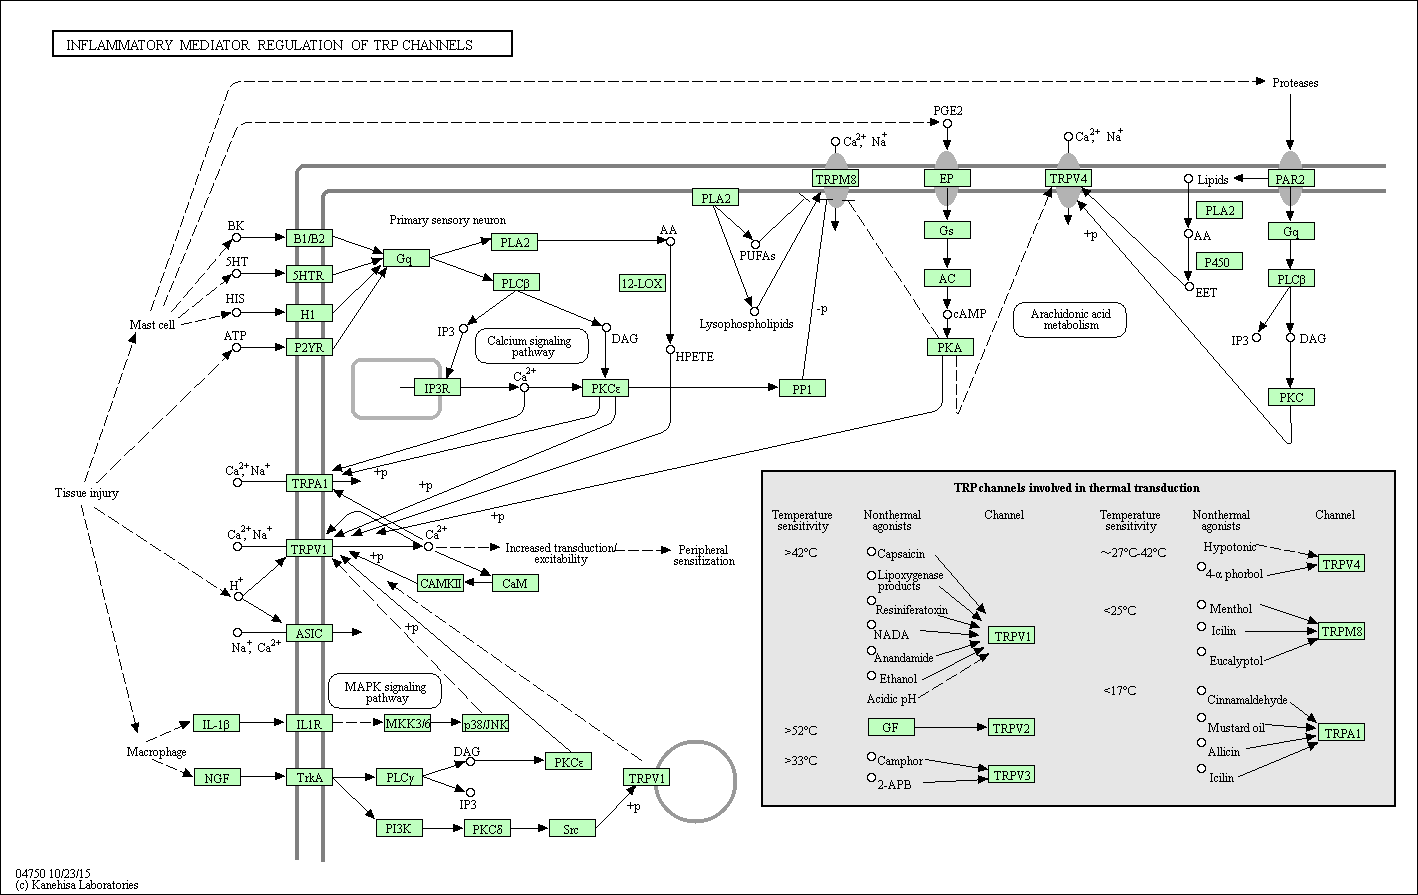

In [153]:
Image(kegg_get(enriched_pathways[random.randint(0,len(enriched_pathways))], "image").read())

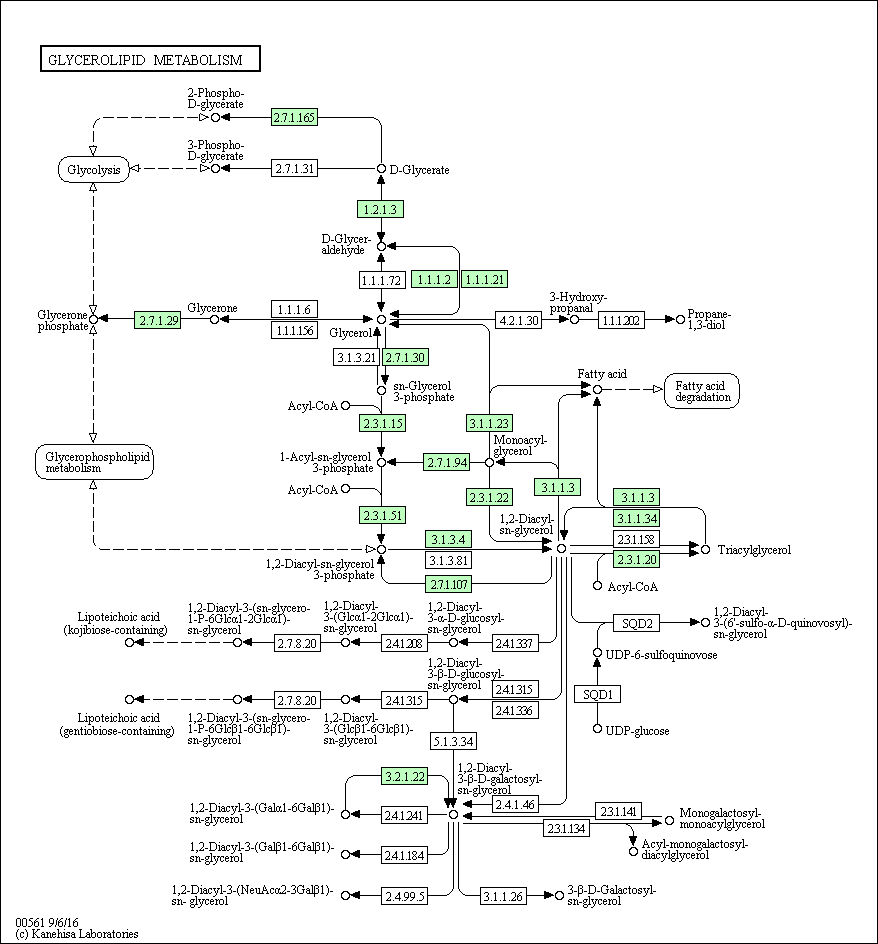

In [154]:
Image(kegg_get(enriched_pathways[random.randint(0,len(enriched_pathways))], "image").read())

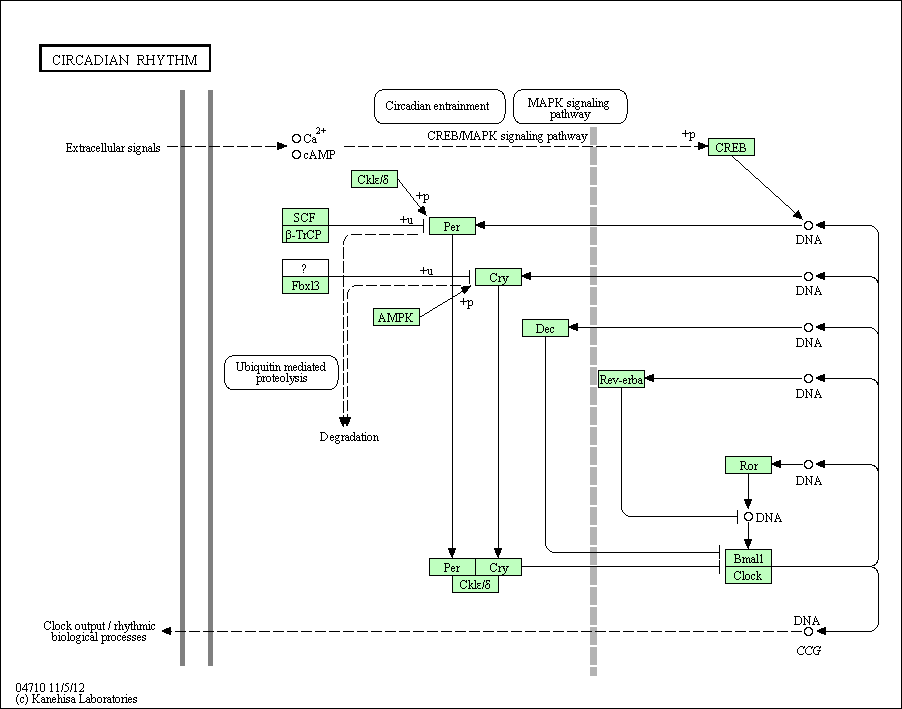

In [155]:
Image(kegg_get(enriched_pathways[random.randint(0,len(enriched_pathways))], "image").read())

### Subtask 3.2: Define a a suitable binary color scheme respresenting the fact whether a gene is significantly expressed or not

hint: 

http://www.rapidtables.com/web/color/RGB_Color.htm

In [282]:
col1 = "#33FFFF"
col2 = "#FF3333"

### Subtask 3.3: Visualize the pathway(s) from 3.1 in such a way that the included genes have the corresponding color from 3.2 ( you may need to define a suitable mapping from single genes to what is actually shown in the pathway map...)

In [300]:
pathway = KGML_parser.read(kegg_get("path:mmu00010", "kgml"))
print pathway
canvas = KGMLCanvas(pathway)
canvas.import_imagemap = True
canvas.draw("fab_map_with_image.pdf")
PDF("fab_map_with_image.pdf")


Pathway: Glycolysis / Gluconeogenesis
KEGG ID: path:mmu00010
Image file: http://www.kegg.jp/kegg/pathway/mmu/mmu00010.png
Organism: mmu
Entries: 99
Entry types:
	ortholog: 26
	gene: 35
	compound: 31
	map: 7



In [316]:
for element in pathway.genes:
    print element
    for graphic in element.graphics:
        graphic.bgcolor = col1

Entry node ID: 13
Names: mmu:11674 mmu:11676 mmu:230163 mmu:353204
Type: gene
Components: set([])
Reactions: rn:R01070
Graphics elements: 1 [<Bio.KEGG.KGML.KGML_pathway.Graphics object at 0x7fea3ec8dc50>]

Entry node ID: 37
Names: mmu:110695 mmu:11669 mmu:11671 mmu:56752 mmu:72535
Type: gene
Components: set([])
Reactions: rn:R00710
Graphics elements: 1 [<Bio.KEGG.KGML.KGML_pathway.Graphics object at 0x7fea3ec8ddd0>]

Entry node ID: 39
Names: mmu:11670 mmu:56847 mmu:621603 mmu:67689 mmu:73458
Type: gene
Components: set([])
Reactions: rn:R00711
Graphics elements: 1 [<Bio.KEGG.KGML.KGML_pathway.Graphics object at 0x7fea3ec8ded0>]

Entry node ID: 44
Names: mmu:58810
Type: gene
Components: set([])
Reactions: rn:R00746
Graphics elements: 1 [<Bio.KEGG.KGML.KGML_pathway.Graphics object at 0x7fea3d1012d0>]

Entry node ID: 45
Names: mmu:11522 mmu:11529 mmu:11532 mmu:26876
Type: gene
Components: set([])
Reactions: rn:R00754
Graphics elements: 1 [<Bio.KEGG.KGML.KGML_pathway.Graphics object at 0x7f

In [303]:
canvas = KGMLCanvas(pathway, import_imagemap=True)
canvas.draw("fab_map_new_colours.pdf")
PDF("fab_map_new_colours.pdf")

In [330]:
def get_included_genes(pway):
    p_genes = []
    for element in pathway.genes:
        print element.name
        if element.name in df_Joined.index:
            p_genes.append(element)
    return p_genes

In [331]:
get_included_genes("path:mmu00010")

mmu:11674 mmu:11676 mmu:230163 mmu:353204
mmu:110695 mmu:11669 mmu:11671 mmu:56752 mmu:72535
mmu:11670 mmu:56847 mmu:621603 mmu:67689 mmu:73458
mmu:58810
mmu:11522 mmu:11529 mmu:11532 mmu:26876
mmu:18597 mmu:18598 mmu:68263
mmu:18597 mmu:18598 mmu:68263
mmu:235339
mmu:106557 mmu:16828 mmu:16832 mmu:16833
mmu:18746 mmu:18770
mmu:13806 mmu:13807 mmu:13808 mmu:433182
mmu:12183 mmu:18648 mmu:56012
mmu:100042025 mmu:14433 mmu:14447
mmu:21991
mmu:18641 mmu:18642 mmu:56421
mmu:14120 mmu:14121
mmu:14751
mmu:66681 mmu:72157
mmu:14751
mmu:15275 mmu:15277 mmu:212032 mmu:216019
mmu:103988
mmu:14751
mmu:319625
mmu:103988
mmu:15275 mmu:15277 mmu:212032 mmu:216019
mmu:14377 mmu:14378 mmu:68401
mmu:13382
mmu:18655 mmu:18663
mmu:18534 mmu:74551
mmu:12183
mmu:12183
mmu:60525 mmu:68738
mmu:72141
mmu:72141
mmu:17330


[]

In [329]:
#attrs = [element.name, element.x, element.y, element.coords, element.type, 
#         element.width, element.height, element.fgcolor, element.bgcolor, 
#         element.bounds, element.centre]

In [317]:
df_Joined.head()

,Diff_Exp,path:mmu00010,path:mmu00020,path:mmu00030,path:mmu00040,path:mmu00051,path:mmu00052,path:mmu00053,path:mmu00061,path:mmu00062,...,path:mmu05321,path:mmu05322,path:mmu05323,path:mmu05330,path:mmu05332,path:mmu05340,path:mmu05410,path:mmu05412,path:mmu05414,path:mmu05416
(2006)']],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
(Japanese)']],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
)']],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610007C21Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610007L01Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [333]:
#workaround to parse Genes per Pathway
def get_gene_ID_per_path(l):
    bla = []
    s = 0
    e = len(lis)
    geneli = []
    mb = []
    genes = []
    for i in range(len(lis)):
        if(lis[i].startswith("GENE")):
            s = i
        elif lis[i].startswith("COMPOUND"):
            e = i
    for k in range(s,e):
        bla.append(lis[k])

    for b in range(len(bla)):
        geneli.append(bla[b].split("\t"))
    for u in range(0, len(geneli)):
        t = str(str(geneli[u]).split(";")).split(" ")
        mb.append(t)
        mb[u] = filter(None, mb[u])
    for r in range(len(mb)):
        if len(mb[r]) > 2:
            #maybe as dictionary 
            #tmp = {mb[r][2].replace("," , "").replace("\"" , "") : mb[r][1]}
            tmp = mb[r][1].replace("," , "").replace("\"" , "")
            genes.append(tmp)
    return genes

In [334]:
id_list = []
for row in df_path_list.index[:-1]:
    lis = kegg_get(row).read().split("\n")
    print row
    id_list.append([row, get_gene_per_path(lis)])

path:mmu00010
path:mmu00020
path:mmu00030
path:mmu00040
path:mmu00051
path:mmu00052
path:mmu00053
path:mmu00061
path:mmu00062
path:mmu00071
path:mmu00072
path:mmu00100
path:mmu00120
path:mmu00130
path:mmu00140
path:mmu00190
path:mmu00220
path:mmu00230
path:mmu00232
path:mmu00240
path:mmu00250
path:mmu00260
path:mmu00270
path:mmu00280
path:mmu00290
path:mmu00300
path:mmu00310
path:mmu00330
path:mmu00340
path:mmu00350
path:mmu00360
path:mmu00380
path:mmu00400
path:mmu00410
path:mmu00430
path:mmu00450
path:mmu00471
path:mmu00472
path:mmu00480
path:mmu00500
path:mmu00510
path:mmu00511
path:mmu00512
path:mmu00514
path:mmu00520
path:mmu00524
path:mmu00531
path:mmu00532
path:mmu00533
path:mmu00534
path:mmu00561
path:mmu00562
path:mmu00563
path:mmu00564
path:mmu00565
path:mmu00590
path:mmu00591
path:mmu00592
path:mmu00600
path:mmu00601
path:mmu00603
path:mmu00604
path:mmu00620
path:mmu00630
path:mmu00640
path:mmu00650
path:mmu00670
path:mmu00730
path:mmu00740
path:mmu00750
path:mmu00760
path:m

In [335]:
allg = pd.DataFrame(id_list, columns=["Pathway_ID", "Genes"])
allg.set_index("Pathway_ID", inplace=True)

In [336]:
allg[]

,Genes
Pathway_ID,
path:mmu00010,"[Hk2, Hk3, Hk1, Hkdc1, Gck, Gpi1, Pfkl, Pfkm, ..."
path:mmu00020,"[Cs, Csl, Acly, Aco2, Aco1, Idh1, Idh2, Idh3g,..."
path:mmu00030,"[Gpi1, G6pd2, G6pdx, Pgls, H6pd, Pgd, Rpe, Tkt..."
path:mmu00040,"[Gusb, Kl, Ugt2b5, Ugt1a2, Ugt1a6a, Ugt2a1, Ug..."
path:mmu00051,"[Mpi, Pmm2, Pmm1, Gmppb, Gmppa, Gmds, Tsta3, F..."
path:mmu00052,"[Galm, Galk1, Galt, Gale, Ugp2, Pgm2, Pgm1, Hk..."
path:mmu00053,"[Ugdh, Ugt2b5, Ugt1a2, Ugt1a6a, Ugt2a1, Ugt1a9..."
path:mmu00061,"[Acaca, Acacb, Mcat, Fasn, Oxsm, Olah, Acsl1, ..."
path:mmu00062,"[Acaa2, Hadhb, Hadh, Hadha, Echs1, Mecr, Ppt1,..."


In [324]:
def draw_kegg_map(map_id):
    """ Render a local PDF of a KEGG map with the passed map ID
    """
    # Get the background image first
    pathway = KGML_parser.read(kegg_get(map_id, "kgml"))
    canvas = KGMLCanvas(pathway, import_imagemap=True)
    img_filename = "%s.pdf" % map_id
    
    for element in pathway.genes:
        for graphic in element.graphics:
            graphic.bgcolor = col1
    
    canvas.draw(img_filename)
    PDF(img_filename)
    


In [326]:
draw_kegg_map("path:mmu00510")

### Subtask 3.4: Define a suitable continuous color range representing the log2 fold changes of the all the genes in your data

hint:

http://bsou.io/posts/color-gradients-with-python

### Subtask 3.5: Visualize the pathway(s) from 3.1 in such a way that the included genes have the corresponding color from 3.4